# Regression analysis

## Advertising dataset

**Import of the libraries useful for the analysis**

In [1]:
# pandas -> read input file and data manipulation
import pandas as pd
pd.set_option("float_format", "{:.2f}".format)

# numpy -> array manipulations
import numpy as np
np.set_printoptions(precision=4, suppress=True)

# matplotlib & seaborn -> plotting
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# sklearn -> data processing, models fit, make predictions and analyze the results
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import mean_squared_error, r2_score

# show sklearn objects in diagram
from sklearn import set_config
set_config(print_changed_only=False, display="diagram")

# statsmodels -> diagnostic measures and q-q plot
from statsmodels.api import add_constant, OLS
from statsmodels.graphics.gofplots import qqplot

# warnings -> to silence warnings
from warnings import filterwarnings
filterwarnings("ignore")

**Read the file advertising.csv**  
The advertising dataset contains the amount invested in three different types of advertising media (tv, radio and newspaper) and the corrispondent sales. The aim of the notebook is to analyze the relationship among investiments in media advertising and sales.

In [2]:
df = pd.read_csv("data/advertising.csv")

**Copy of the dataframe**

In [3]:
df_ = df.copy()

**Name of the columns/variables**  
The dataset contains 4 columns: TV, radio, newspaper and sales.

In [4]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

**Shape of the dataframe**  
The dataset is composed by 200 rows and 4 columns.

In [5]:
df.shape

(200, 4)

**Show 10 random observations**  
We have only numerical variables (type ```float```).

In [6]:
df.sample(10)

,TV,radio,newspaper,sales
107,90.40,0.30,23.20,8.70
153,171.30,39.70,37.70,19.00
84,213.50,43.00,33.80,21.70
133,219.80,33.50,45.10,19.60
121,18.80,21.70,50.40,7.00
23,228.30,16.90,26.20,15.50
68,237.40,27.50,11.00,18.90
168,215.40,23.60,57.60,17.10
134,36.90,38.60,65.60,10.80
114,78.20,46.80,34.50,14.60


**Informations about missing values and variables types**  
The variables doesn't have any missing values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**Statistical informations about numerical variables**

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


**We use a pairplot to have a visual overview of the relatioship between the variables**

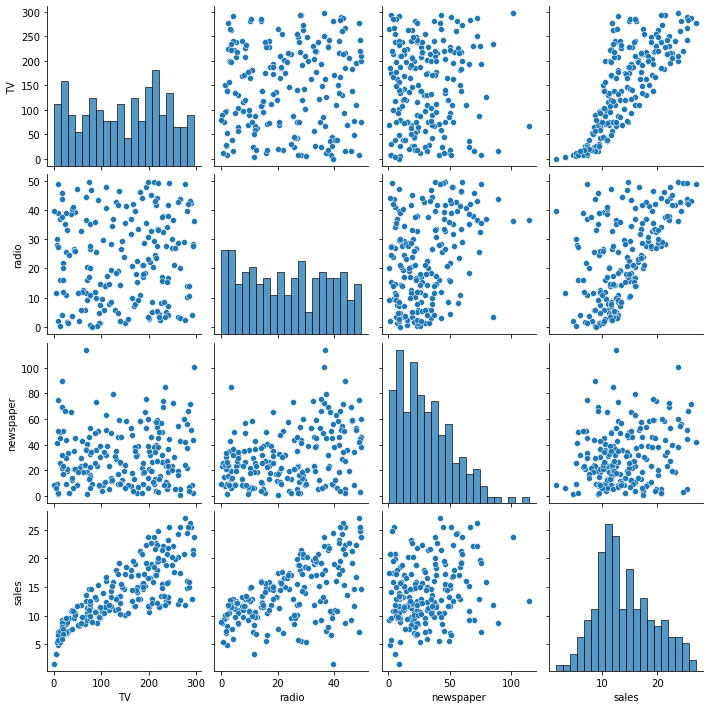

In [9]:
sns.pairplot(data=df, diag_kind="hist", diag_kws={"bins": 20, "edgecolor": "black"})
plt.show()

**We can go deep and compute the correlation among variables and see if there are interesting values**

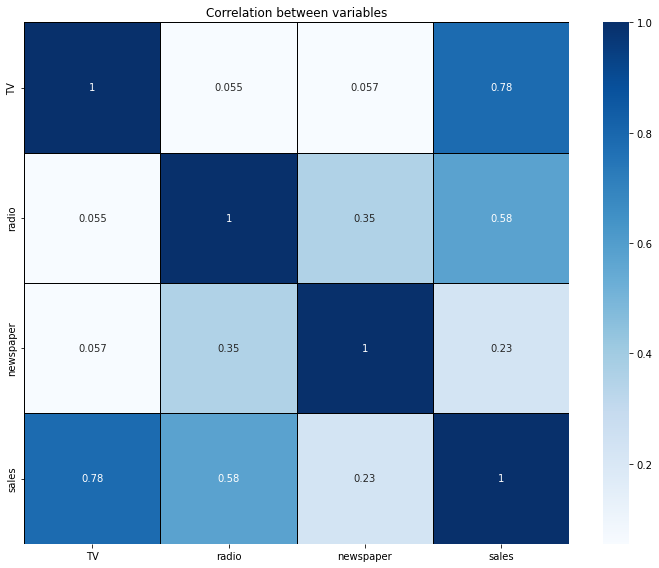

In [10]:
plt.figure(figsize=(10, 8))
plt.title(label="Correlation between variables")
sns.heatmap(data=df.corr(), cmap="Blues", annot=True, linewidths=0.5, linecolor="black")
plt.tight_layout()
plt.show()

### Regression analysis  
We are in a regression problem when the target variable is continuous.

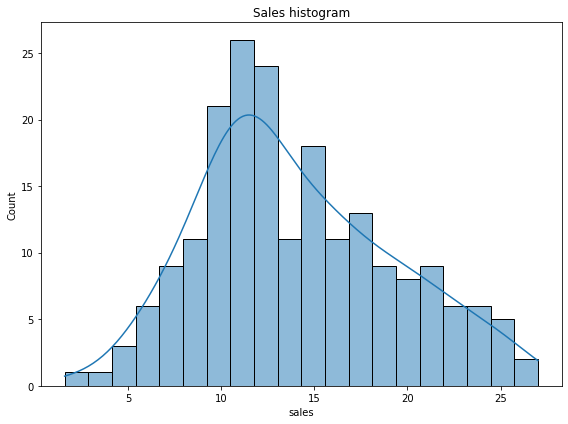

In [11]:
plt.figure(figsize=(8, 6))
plt.title(label="Sales histogram")
sns.histplot(data=df, x="sales", bins=20, kde=True)
plt.tight_layout()
plt.show()

### Simple linear regression
In the simple linear regression model we have only one variabile as predictor.

**Before starting the regression analysis, we have to check that the assumptions of the linear regression model are satisfied:**
1. Linearity relationship between predictors and target variable
2. Lack of perfect multicollinearity in the predictors
3. Constant variance in the error (omoschedasticity)
4. The residuals are normally distributed

**Looking at the pairplot and the correlations heatmap, the TV variable looks the best to start with a simple linear regression analysis**  
We define the ```X``` and ```y``` variables, so that scikit-learn model can read it regularly.

In [12]:
X = df["TV"].values
y = df["sales"].values

**Change the shape of the X array using the method ```reshape```**  
The **-1, 1** values inside the reshape method means that numpy has to compute the first value relying on the second value that we have defined.

In [13]:
X = X.reshape(-1, 1)

**Check out the properties of the new objects defined**  
Now we have numpy arrays, and the ``X`` array has a new dimension.

In [14]:
print(f"TV -> type object: {type(X)}, shape: {X.shape}")
print(f"sales -> type object: {type(y)}, shape: {y.shape}")

TV -> type object: <class 'numpy.ndarray'>, shape: (200, 1)
sales -> type object: <class 'numpy.ndarray'>, shape: (200,)


**The ```LinearRegression``` estimator is a class object that can be imported from the library scikit-learn**  
The linear regression fits a linear model to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation (loss function).  
As we can see from the image, the simple linear regression finds the best line among a set of points using the ordinary least squares method (OLS).

<img src=https://dustinstansbury.github.io/theclevermachine/assets/images/cutting-your-losses/lss-gives-rss.png width="500">

The loss function formula is:

\begin{equation} MSE(y,\hat{y})=\frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2 \end{equation}

where $y_i$ is the observed value in the dataset and $\hat{y}_i$ is the value predicted from the model. The choice of this formula as loss function is not casual, in fact the square of the errors allows to:
* avoid negative distances (they not exists)
* avoid compensating distances among them
* give more importance to bigger distances

documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

**Definition of the model**  
With this definition of the model, we can refer to the object ```LinearRegression()``` with ```lr```.

In [15]:
lr = LinearRegression()

**Now we can fit the ```LinearRegression``` model to the data, so the parameters of the linear regression are estimated**  
In a simple linear regression model, we have only two parameters to estimate:
* $𝛽_0$: the intercept of the regression line
* $𝛽_1$: the coefficient of the selected predictor

In [16]:
lr.fit(X=X, y=y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False,
                 positive=False)

**So after the operation, the ```lr``` object has two new attributes:**
* ```intercept_```: that contains the intercept of the regression line 
* ```coef_```: that contains the coefficients

**Given the formula of the simple linear regression model:**

\begin{equation} y=\beta_0 + \beta_1x_1 \end{equation}

**With the intercept and coef values, we can build the linear regression function:**

\begin{equation} y=7.032593549127693 + 0.04753664x_1 \end{equation}

**How this parameters are estimated? Using the gradient descent!**  
The gradient descent, is a technique that allows to find the maximum or minimum value of a function with one or more variables.This technique is widely used in the world of machine learning, because allows to estimate with great precision the value of the parameters in a computationally efficient way. In this case, the gradient descent tries to minimize the residual sum of squares of the errors.

**But how can we interpret them?**  
* The value of the intercept, tell us that for a null investiment in TV, we have a value of sales equals to ~ 7.03
* The value of the coefficient indicates that for every investiment in one unit of TV, we have an increase of sales of ~ 0.05

In [17]:
print(f"intercept: {lr.intercept_}, coefficient: {lr.coef_[0]}")

intercept: 7.032593549127693, coefficient: 0.047536640433019764


**Plot of the regression line using the coefficients**

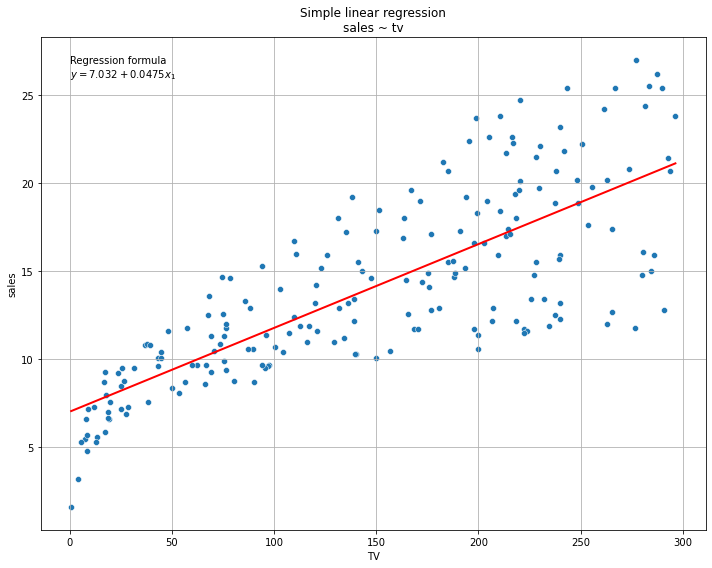

In [18]:
# compute the y values of the linear regression line
y_pred = lr.predict(X)

# aesthetic plot parameters  
title = "Simple linear regression" + "\n" + "sales ~ tv"
text = "Regression formula" + "\n" + "$y = 7.032 + 0.0475x_1$"

# plot of the figure
plt.figure(figsize=(10, 8))
plt.title(label=title)
sns.scatterplot(x="TV", y="sales", data=df)
sns.lineplot(x=df["TV"], y=y_pred, linewidth=2, color="red")
plt.text(x=0, y=26, s=text)
plt.grid()
plt.tight_layout()
plt.show()

**We can use the function of the fitted model to predict sales using custom values of tv investiment**

In [19]:
# predict sales using one value
lr.intercept_ + lr.coef_ * 150

array([14.1631])

In [20]:
# predict sales using a range of values
lr.intercept_ + np.dot(a=lr.coef_[0], b=np.arange(start=0, stop=300, step=50))

array([ 7.0326,  9.4094, 11.7863, 14.1631, 16.5399, 18.9168])

**Check if there is a linear relationship between the predictor and the target***  
We can check the quality of our univariate model using the ``f_regression`` function, that computes the *F-statistic* and *p-values*. Basically, the function performs an hypothesis test with the following hypothesis:
* $H_0 : \beta_1 = 0$
* $H_A : \beta_1 \neq 0$

because if $\beta_1=0$ the model equation is $y=\beta_0$ and X is not associated with y. 

As we can see from the results of the F-statistic and p-value above, there is a clear evidence of a relationship between tv and sales (we rejected the null hypotesis).  

documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html

In [21]:
f_statistic, p_value = f_regression(X=X, y=y)

print(f"F-statistic: {f_statistic[0]:.4f}, p-value: {p_value[0]}")

F-statistic: 312.1450, p-value: 1.467389700195314e-42


**We can use the residuals vs. fitted plot to verify the assumption of omoschedasticity**  
The fitted vs. residuals plot show the distance among the observed values in the data and the values predicted by the model (residuals) and is very useful to check if there are patterns in these points.  
In this case, the plot indicates a clear presence of eteroschedasticity because the standard deviation of the residuals is not constant.

In [25]:
y_pred.shape

(200,)

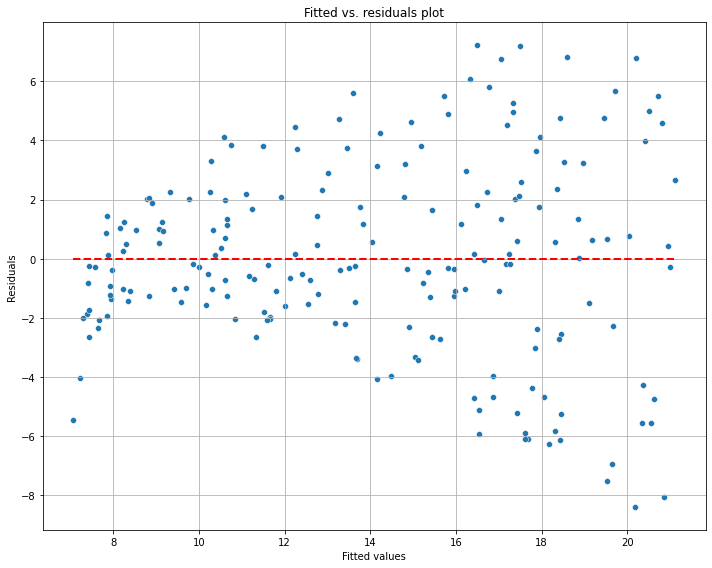

In [22]:
# compute the residuals of of the fitted model
residuals = df["sales"] - y_pred

# aestethic plot parameters
xmin, xmax = y_pred.min(), y_pred.max()

# plot of the figure
plt.figure(figsize=(10, 8))
plt.title("Fitted vs. residuals plot")
sns.scatterplot(x=y_pred, y=residuals)
plt.hlines(y=0, xmin=xmin, xmax=xmax, colors="red", linestyles="--", linewidth=2)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.grid()
plt.tight_layout()
plt.show()

**Another way to check the godness of the fitted model, is to use the Q-Q plot**  
The Q-Q plot is a representation of the distribution of the data. If the points lies on the 45° line, the points are normally distributed

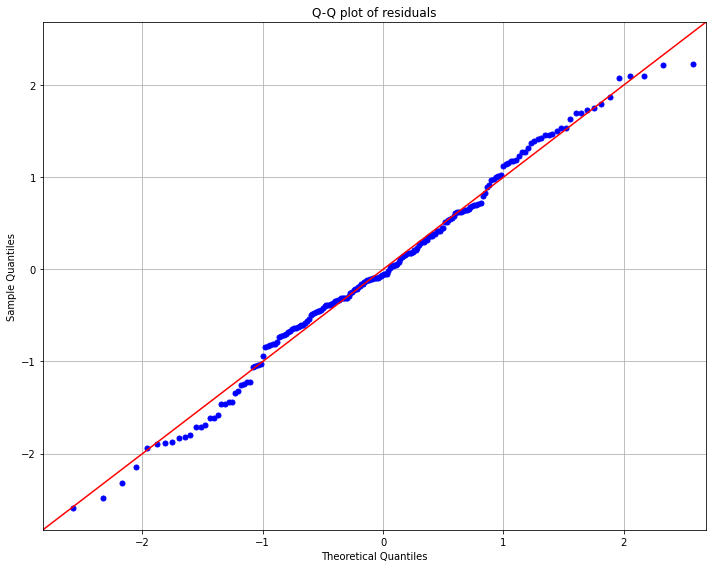

In [23]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
qqplot(data=residuals, line="45", fit="True", markersize=5, ax=ax)
plt.title("Q-Q plot of residuals")
plt.grid()
plt.tight_layout()
plt.show()

**The model fitted looks decent but it can be improved in two different ways:**
* Add more predictors to our model
* Use a different model

### Multiple linear regression  
In the multiple linear regression we have two or more predictors.

**We define the new X and y variables**

In [24]:
X = df[["TV", "radio", "newspaper"]].values
y = df["sales"].values

**Since we created our X variable with three columns, we don't need to reshape the array**

In [25]:
print(f"TV -> type object: {type(X)}, shape: {X.shape}")
print(f"sales -> type object: {type(y)}, shape: {y.shape}")

TV -> type object: <class 'numpy.ndarray'>, shape: (200, 3)
sales -> type object: <class 'numpy.ndarray'>, shape: (200,)


**Check the assumption of indipendence of predictors using variance inflation factor (VIF)**  
The variance inflation factor is used to measure the collinearity among predictors in a multiple linear regression problem. A VIF value of 1 indicates the absence of collinearity, while a value > 5 or 10 indicates a presence of collinearity. 

The VIF is defined by the following formula:

\begin{equation} VIF_i= \frac{1}{1-R_i^2} \end{equation}

where $R_i^2$ represents the unadjusted coefficient of determination for regressing the ith independent variable on the remaining ones.

link: https://en.wikipedia.org/wiki/Variance_inflation_factor

**Definition of the function to compute vif**

In [26]:
def variance_infation_factor(X):
    """
    Compute the predictor's variance infation factor.
    
    Parameters
    ----------
    X: np.array
        array with predictors
        
    Returns
    -------
    np.array
        vif for each predictor
    """
    pcc = np.corrcoef(x=X, rowvar=False)
    vif = np.linalg.inv(a=pcc)
    return vif.diagonal()

**Call the function to compute vif on defined predictors matrix**  
As we can see from the results, there is no evidence of multicollinearity.

In [27]:
variance_infation_factor(X=X)

array([1.0046, 1.145 , 1.1452])

**Create or new linear regression model and fit to the data**

In [28]:
lr = LinearRegression()
lr.fit(X=X, y=y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False,
                 positive=False)

Now, in the ```lr.coef_``` attribute there are three coefficients, one for each predictor. Every coefficient indicates how the sales changes adding one unit of the relative variable.

We can generally write the function of the multiple linear regression as:

\begin{equation} y=\beta_0 + \beta_1x_1 + ... + \beta_nx_n \end{equation}

With the intercept and coef values, we can build the new linear regression function:

\begin{equation} y=2.9388893694594067 + 0.04576465x_1 + 0.18853002x_2 - 0.00103749x_3\end{equation}

Analyzing the coefficients, we can see that the values of the intercept and TV coefficient are changed, because with the introduction of new variables we have an element of 'interaction' among them. This characteristic indicates that in a multiple linear regression is very important the phase of feature selection, because the presence or absence of one feature can change sensibly the coefficients and consequently the quality of the model itself. The coefficient of newspaper is very low compared to the others, sign that the variable is not very informative.

In [29]:
print(f"intercept: {lr.intercept_}, coefficients: {lr.coef_}")

intercept: 2.938889369459412, coefficients: [ 0.0458  0.1885 -0.001 ]


**In a multiple linear regression analysis, the ```f_regression``` function is not useful because the regression test are univariate**  
To compute the multivariate regression tests, we create a custom function using statsmodels.

In [30]:
def p_values(X, y):
    """
    Compute p-values from multivariate linear regression
    
    Parameters
    ----------
    X: np.array
        array with predictors
    y: np.array
        target variable array
        
    Returns
    -------
    np.array
    """
    X = add_constant(data=X)
    ols = OLS(endog=y, exog=X)
    results = ols.fit()
    return results.pvalues[1:]

**Call the function to compute p-values**  
As we can see from the results, the p-value for the variable newspaper is not significative.

In [31]:
p_values(X=X, y=y)

array([0.    , 0.    , 0.8599])

**With a multiple linear regression model we can't plot the regression line because we have many dimensions**  
In this case, we can inspect the model using the function ```plot_partial_dependence```, when the partial dependence of a feature (or a set of features) corresponds to the average response of an estimator for each possible value of the feature.  

Definition of the function:
```python
plot_partial_dependence(
    estimator,
    X,
    features,
    feature_names=None,
    target=None,
    response_method='auto',
    n_cols=3,
    grid_resolution=100,
    percentiles=(0.05, 0.95),
    method='auto',
    n_jobs=None,
    verbose=0,
    line_kw=None,
    contour_kw=None,
    ax=None,
    kind='average',
    subsample=1000,
    random_state=None,
)
```

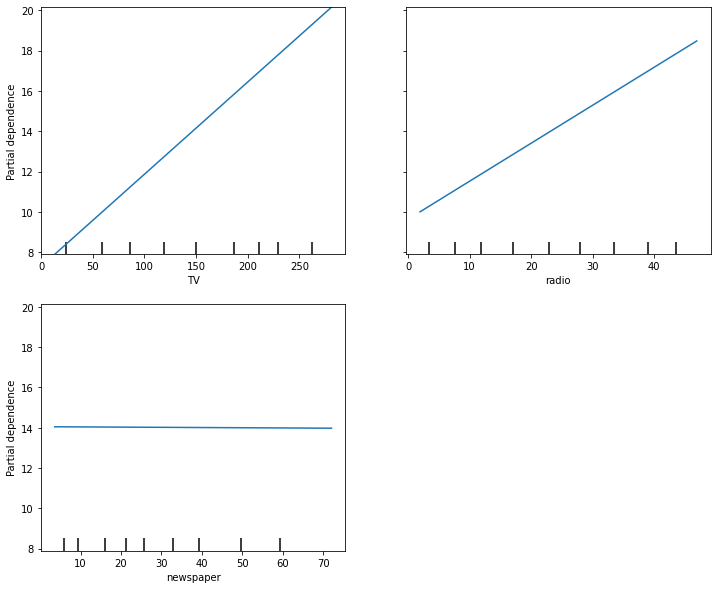

In [32]:
features = list(range(0, len(df.columns[:-1])))

fig = plt.figure(figsize=(12, 10))
ax = fig.subplots()
plot_partial_dependence(estimator=lr, X=X, features=features, feature_names=df.columns[:-1], n_cols=2, ax=ax)
fig.show()

**Linear regression diagnostic plots**  
Define a function to show the residuals plot and the Q-Q plot.

In [26]:
def diagnostic_plot(y_true, y_pred):
    """
    Create diagnostic plots of regression model
    
    Parameters
    ----------
    y_true: np.array
        target values
    y_pred: np.array
        predicted values
    
    Returns
    -------
    None
    """
    residuals = y_true - y_pred
    xmin, xmax = y_pred.min(), y_pred.max()
    fig = plt.figure(figsize=(10, 12))
    ax = fig.subplots(nrows=2, ncols=1)
    ax[0].set_title("Residuals vs. fitted plot")
    sns.scatterplot(x=y_pred, y=residuals, ax=ax[0])
    ax[0].hlines(y=0, xmin=xmin, xmax=xmax, colors="red", linestyles="--", linewidth=2)
    ax[0].set_xlabel("Fitted values")
    ax[0].set_ylabel("Residuals")
    ax[1].set_title("Q-Q plot of residuals")
    qqplot(data=residuals, line="45", fit="True", markersize=5, ax=ax[1])
    plt.tight_layout()
    plt.show()

**Call the function to show regression diagnostic plots**  
If the relationship among predictors and target is linear, then the residual plots should display no pattern. In this case, the residuals plot display a clear pattern and there are evidence of high leverage points, probably caused to some anomaly values of radio.

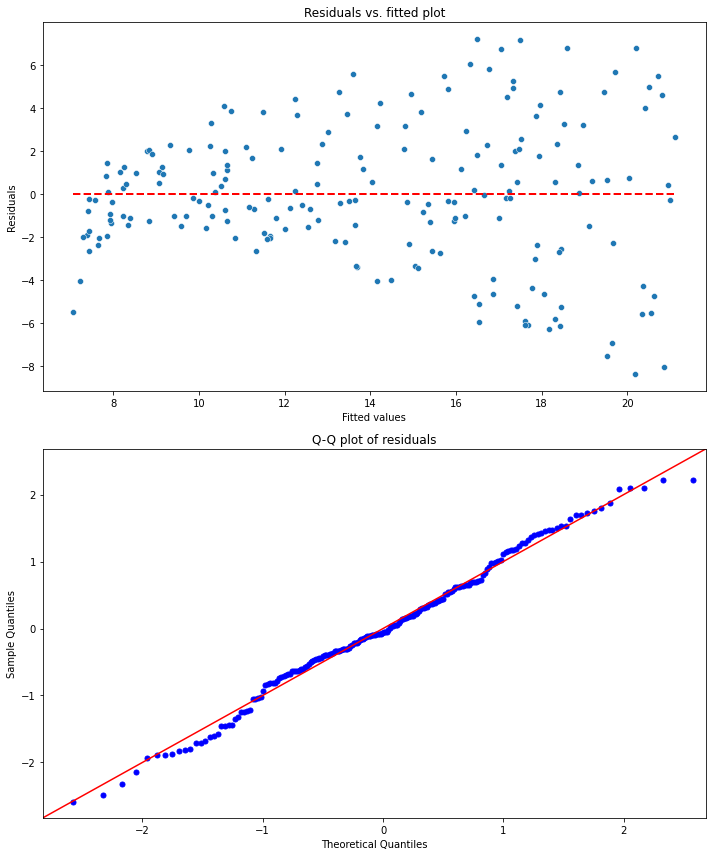

In [27]:
y_pred = lr.predict(X=X)

diagnostic_plot(y_true=y, y_pred=y_pred)

**Inspect inside the copy of the dataframe to find the high leverage values**  
Creating an additional column with the residual values and search the rows with a residual value lower than -4.

In [35]:
df_["residual"] = df_["sales"] - y_pred

high_leverage = df_[df_["residual"] <= -4]
high_leverage

,TV,radio,newspaper,sales,residual
5,8.70,48.90,75.00,7.20,-5.28
35,290.70,4.10,8.50,12.80,-4.21
130,0.70,39.60,8.70,1.60,-8.83
178,276.70,2.30,23.70,11.80,-4.21


**Definition of new a dataframe with the filtered observations**  
We use the high leverage index values to filter the dataframe and assign the result to the ```df_filtered``` variable.

In [36]:
df_filtered = df[~df.index.isin(high_leverage.index)]

### Predictive analysis  
To perform the predictive analysis we have to split the dataset in two different sets:
* **training set**, used to fit the model to the data and estimate the coefficients
* **test set** to observe the quality of predictions of the model using new data  

<img src=https://static.packt-cdn.com/products/9781789347999/graphics/54a0d00e-9768-4862-bac8-d6b98c9f2907.png width="450">

**We use the filtered data with tv and radio variables as predictors**

In [37]:
X = df_filtered[["TV", "radio"]].values
y = df_filtered["sales"].values

**Split of the dataset into traning set and test set using the ```train_test_split``` function**  
We randomly splitting the values of the dataset assigning the 80% of the values into the traning test, and the remaining part to the test set. We are defining a ```random_state``` parameter to set a seed, so the values are splitted by sets in the same way.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

print(f"training set size: {X_train.shape}, test set size: {X_test.shape}")

training set size: (156, 2), test set size: (40, 2)


**Standardization**  
The linear regression model is sensitive to the scale of the data, so when we build a multiple linear regression model is highly recommended to standardize the features to bring them in the same scale.  
The standardization is computed by removing the mean and scaling to unit variance using the following formula:

\begin{equation} Z=\frac{X - \mu}{\sigma} \end{equation}

where $\mu$ is the mean of the training samples, and $\sigma$ is the standard deviation of the training samples.  
Standardize the features allows at the model to compute the coefficients more accurately and faster. We can use the ```StandardScaler``` transformer included in scikit learn to do this transformation.  
documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

**Definition of the estimator**

In [39]:
ss = StandardScaler()
ss

StandardScaler(copy=True, with_mean=True, with_std=True)

**Scaling of the training and test features**  
We use the ```fit_transform``` method to compute the mean and standard deviation required to standardize the data and transform the the data itself, that is assigned to the ```X_train_std``` variable. After this operation, we can use the same ```StandardScaler``` object to directly transform the training test data. We are making the fit only on the training set because we don't want to expose the model to informations that he shouldn't have, avoiding data leakage problems.

In [40]:
X_train_std = ss.fit_transform(X=X_train)
X_test_std = ss.transform(X=X_test)

**Check for the computed statistics**  
After the fit of the model, is possible to get the values of mean and standard deviation computed by the scaler. This values can be used to make an inverse transformation of the scaled data.

In [41]:
ss.mean_, ss.var_

(array([148.3833,  22.6571]), array([7271.2396,  222.2267]))

**We can use the fitted scaler to obtain the original values from the scaled data**  
To do this, we can use the method ```inverse_transform``` of the scaler object to the scaled data.

In [42]:
X_train_inv = ss.inverse_transform(X=X_train_std)

**Comparing original, scaled data and inversed data**

In [43]:
# headers of the arrays
print("original \t\t scaled \t\t\t\t inversed")

# print of the first 10 rows of the arrays
for original, scaled, inversed in zip(X_train[:10, :], X_train_std[:10, :], X_train_inv[:10, :]):
    print(f"{original} \t\t {scaled} \t\t\t {inversed}")

original 		 scaled 				 inversed
[57.5 32.8] 		 [-1.0658  0.6804] 			 [57.5 32.8]
[139.3  14.5] 		 [-0.1065 -0.5472] 			 [139.3  14.5]
[184.9  43.9] 		 [0.4282 1.425 ] 			 [184.9  43.9]
[135.2  41.7] 		 [-0.1546  1.2774] 			 [135.2  41.7]
[164.5  20.9] 		 [ 0.189  -0.1179] 			 [164.5  20.9]
[87.2 11.8] 		 [-0.7175 -0.7283] 			 [87.2 11.8]
[215.4  23.6] 		 [0.7859 0.0633] 			 [215.4  23.6]
[97.5  7.6] 		 [-0.5967 -1.01  ] 			 [97.5  7.6]
[74.7 49.4] 		 [-0.8641  1.794 ] 			 [74.7 49.4]
[234.5   3.4] 		 [ 1.0099 -1.2918] 			 [234.5   3.4]


**Fit of the model**

In [44]:
lr = LinearRegression()
lr.fit(X=X_train_std, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False,
                 positive=False)

**Analysis of the coefficients**  
Since we have standardized the features, the coefficients of the model now are computed considering this change of scale. This operation made the interpretation of the coefficients more difficult, but there are two indicator that we can use:
* the sign of the coefficient
* the value of the coefficient  

Doing this simple analysis, we can say that investiment in tv and radio increase the sales, and tv has a greater impact on sales than radio.

In [45]:
print(f"intercept: {lr.intercept_}, coefficients: {lr.coef_}")

intercept: 14.076923076923084, coefficients: [3.7994 2.8563]


**Plot of the regression plane**

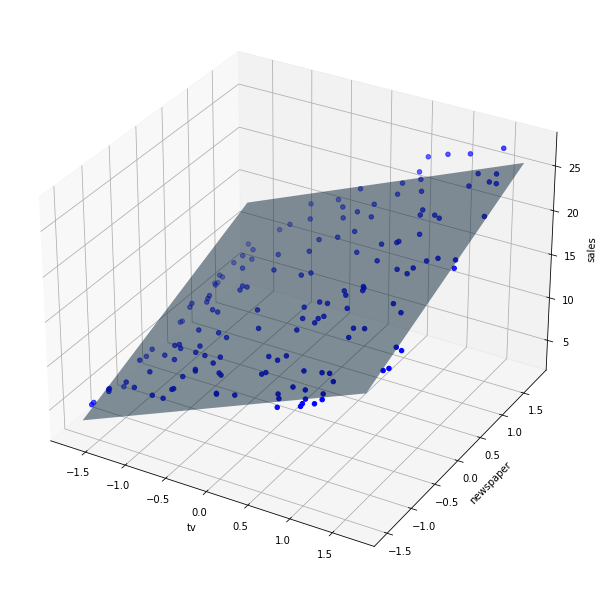

In [46]:
# compute predictors minimum and maximum values 
xmin, xmax = X_train_std[:, 0].min(), X_train_std[:, 0].max()
ymin, ymax = X_train_std[:, 1].min(), X_train_std[:, 1].max()

# define plane axis values
X = np.array([[xmin, xmin], [xmax, xmax]])
Y = np.array([[ymin, ymax], [ymin, ymax]])
Z = lr.predict(np.array([[xmin, xmin, xmax, xmax], [ymin, ymax, ymin, ymax]]).T).reshape(2, 2)

# plot of the figure
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig=fig, elev=30)
ax.scatter(xs=X_train_std[:, 0], ys=X_train_std[:, 1], zs=y_train, c="blue")
ax.plot_surface(X=X, Y=Y, Z=Z, alpha=.5)
ax.set_xlabel("tv")
ax.set_ylabel("newspaper")
ax.set_zlabel("sales")
plt.show()

**Compute the predictions**  
After the fit of the model, we can compute the predictions on the test set and store them in the ```y_pred``` variable

In [47]:
y_pred = lr.predict(X=X_test_std)

print(y_pred)

[19.3102 13.1766 23.25   13.9541 10.048   6.276  10.7566 12.8717 14.2668
  7.8489 12.5179 13.1579 11.1629 16.7565  6.6817 12.0665 12.5391  7.1808
 12.2504  8.5577 15.5757 16.455  18.5376 21.7649 15.8358 21.1955 15.4963
 19.9785 11.4887 17.8586 20.876   8.1198 17.1381 15.5088  9.652  15.3865
 22.0203 18.1628 19.5388  9.0939]


**Error metrics**  
In regression analysis, is possibile to measure the prediction quality of a model using various error metrics, that tell us how much the predicted values by the model are close to the real labelled data.
There are many metrics that can be used in this case, but we focus on the most used and useful:
* mean squared error
* root mean squared error
* r2 score

**Manual computing of mean squared error**

In [48]:
mse = np.sum((y_test - y_pred)**2)/y_test.shape[0]
mse

2.0209646560314605

**Manual computing of root mean squared error**  
The root mean squared allows to obtain an error with the same size of the target variable and is simply the squared root of the mse.

\begin{equation} RMSE(y,\hat{y})=\sqrt{\frac{1}{n}\sum_{i=1}^n (y_i-\hat{y}_i)^2} \end{equation}

In [49]:
rmse = np.sqrt(np.sum((y_test - y_pred)**2) / y_test.shape[0])
rmse

1.4216063646563561

**Computing the mse and rmse with scikit-learn**

In [50]:
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

print(f"mean squared error: {mse:.4f}, root mean squared error: {rmse:.4f}")

mean squared error: 2.0210, root mean squared error: 1.4216


**The $r^2$ score**  
Also known as coefficient of detrmination, is the proportion of the variance in the dependent variable that is predictable from the independent variables.
This indicator can vary from -∞ to 1 where incresing values indicates better results. In cases where negative values arise, the mean of the data provides a better fit to the outcomes than do the fitted model.

The areas of the blue squares represent the squared residuals with respect to the linear regression. The areas of the red squares represent the squared residuals with respect to the average value.

\begin{equation} R^2=1-\frac{\color{blue}{SS_{res}}}{\color{red}{SS_{tot}}} \end{equation}

<img src=https://upload.wikimedia.org/wikipedia/commons/8/86/Coefficient_of_Determination.svg width=750>

link: https://en.wikipedia.org/wiki/Coefficient_of_determination

**We can measure the $r^2$ score in two different ways:**
* calling the method ```score``` of the ```lr``` object
* using the ```r2_score``` function of scikit-learn  

The ```score``` method is faster to use, but if we have computed and stored the predictions, the use of the ```r2_score``` function is recommended

In [51]:
# using the method score
r2 = lr.score(X_test_std, y_test)

print(f"r2 score: {r2:.4f}")

r2 score: 0.9179


In [52]:
# using the r2_score function
r2 = r2_score(y_true=y_test, y_pred=y_pred)

print(f"r2 score: {r2:.4f}")

r2 score: 0.9179


**BONUS**  
Using the ```TransformedTargetRegressor``` we create a linear regression model that transform the target variable using the square root before the fit, and make the inverse transformation to compute the error metrics.  
documentation: https://scikit-learn.org/stable/modules/generated/sklearn.compose.TransformedTargetRegressor.html

**Definition of the model and fit to the data**

In [53]:
ttr = TransformedTargetRegressor(regressor=LinearRegression(), func=np.sqrt, inverse_func=lambda x: x**2)
ttr.fit(X_train_std, y_train)

TransformedTargetRegressor(check_inverse=True, func=<ufunc 'sqrt'>,
                           inverse_func=<function <lambda> at 0x7f138ece5c10>,
                           regressor=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False,
                                                      positive=False),
                           transformer=None)

**Compute the $R^2$ score**  
We got an $R^2$ of ~0.93, a little better compared to the last model we fitted.

In [54]:
ttr.score(X_test_std, y_test)

0.9310803076456418

### <font color= "blue"> Linear Regression model </font>
- **supervised model**: the data must have the target variable
- **parametric model**: make assumption of linearity among predictors and target variable

#### <font color= "green"> Pros: </font>
* Can be used with few data
* Computationally efficient
* Easy to interpret

#### <font color= "red"> Contros: </font>
* Make many assumptions about data
* Can't interpret non-linear relationships
* Sensitive to outliers

**Use when**: the target variable is continuous and there are evidence of a linear relationship among the feature/s and target variable.

### <font color= "red"> Exercise: </font>

**Read the auto_mpg.csv file in the data folder and make a regression analysis using the variable mpg as target.**


**Attribute Information**:
1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)


**Relevant Papers:**  
*Quinlan, R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.*

**NB** The dataset contains missing values, so you have to handle this data points